# Intro to TensorFlow

[Understanding TensorFlow Language](#Understanding-TensorFlow-Language)

 - [constant](#constant)
 - [placeholder](#placeholder)
 - [Recap](#Recap)

[Tensorboard: Visualize your Graph](#Tensorboard:-Visualize-your-Graph)

- [Writer and Launch Tensorboard](#Writer-and-Launch-Tensorboard)

- [Name your Tensors & Operations](#Name-your-Tensors-&-Operations)

[Least Square Regression: a start-up example](#Least-Square-Regression:-a-start-up-example)

- [Clean Version](#Clean-Version)
- [Detailed Version](#Detailed-Version)

[Save and Restore Models in TensorFlow](#Save-and-Restore-Models-in-TensorFlow)



*Notes:* 

*1. There are many fruitful GitHub repositories for TensorFlow examples, such as [aymericdamien](https://github.com/aymericdamien/TensorFlow-Examples/tree/master/examples), [pkmital](https://github.com/pkmital/tensorflow_tutorials).*

*2. Good intro course of TensorFlow in Deep Learning: [Stanford CS20](http://web.stanford.edu/class/cs20si/syllabus.html)*.

## Understanding TensorFlow Language
 
### constant
This [blog](http://blog.csdn.net/lenbow/article/details/52152766) introduces some functions in TensorFlow.

In [19]:
import numpy as np
import tensorflow as tf

a = tf.constant(2)
b = tf.constant(3)
x = tf.add(a, b)
print(a) # a tensor hasn't been evaluated (constant)
print(x) # a tensor hasn't been evaluated (operation)

Tensor("Const_2:0", shape=(), dtype=int32)
Tensor("Add:0", shape=(), dtype=int32)


In [20]:
# You must start a Session before you can run (in order to evaluate) the operation x
with tf.Session() as sess:
    print(sess.run(x))

5


In [21]:
# just another similar example on matrixs
matrix1 = tf.constant([[3., 3.]])
matrix2 = tf.constant([[2.],[2.]])
product = tf.matmul(matrix1,matrix2)
with tf.Session() as sess:
    print(sess.run(product))
    print(tf.shape(matrix2))

[[ 12.]]
Tensor("Shape:0", shape=(2,), dtype=int32)


### placeholder

In [22]:
c = tf.placeholder(tf.int16)
d = tf.placeholder(tf.int16)
add = tf.add(c, d)
mul = tf.multiply(c, d)
with tf.Session() as sess:
    # Every time when you evaluate any operation involving variables
    # you **must** feed variable values to "feed_dict"
    print("Addition: %i" % sess.run(add, feed_dict={c: 2, d: 3}))
    print("Multiplication 1st: %i" % sess.run(mul, feed_dict={c: 2, d: 3}))
    print("Multiplication 2nd: %i" % sess.run(mul, feed_dict={c: 4, d: 5}))

Addition: 5
Multiplication 1st: 6
Multiplication 2nd: 20


### Recap

- 将计算流程表示成 Graph；
- 通过 Session 来执行图计算；
- 将数据表示为 Tensors (constant & placeholder)；
- 使用 Variables 来保持状态信息 (比如模型权重)；
- 使用 feed (feed_dict) 为 operation 填充数据；
- 使用 fetches (sess.run()) 抓取 operation 结果；

**graph <=  Session <= operation <= tensor**
 
 让 tensor (张量) 及一系列 operation (操作) 通过 Session (会话) 这个载体来运行生成 graph (图) 以完成整个运算.
 
*Notes:*

*[1] You can find official explanations to graph, session, operation, tensor in [TensorFlow documentations](https://www.tensorflow.org/programmers_guide/low_level_intro). (but not recommanded)*

*[2] [Good reference here](http://www.jeyzhang.com/tensorflow-learning-notes.html)*


## Tensorboard: Visualize your Graph

### Writer and Launch Tensorboard

In [23]:
# Clean previous graph to illustrate the simplest example
tf.reset_default_graph()

a = tf.constant(2)
b = tf.constant(3)
x = tf.add(a, b)

# Create the summary writer **after** graph definition and **before** running your session
writer = tf.summary.FileWriter('./graphs', tf.get_default_graph())
with tf.Session() as sess:
    print(sess.run(x))

writer.close() #close the writer when you’re done using it

# Now to visualize your graph in Tensorbiard, please go to terminal and run:
# $ python3 [yourprogram].py
# $ tensorboard --logdir="./graphs" --port 6006
# Then open your browser and go to: http://localhost:6006/

5


### Name your Tensors & Operations

In [24]:
tf.reset_default_graph()

a = tf.constant(2, name='a')
b = tf.constant(3, name='b')
x = tf.add(a, b, name='Addition')

writer = tf.summary.FileWriter('./graphs', tf.get_default_graph())
with tf.Session() as sess:
    print(sess.run(x))

writer.close()

# Now please refresh: http://localhost:6006/#graphs

5


*Notes:*

*[1] Some times when you need to work with multiple graphs, refer to this [issue](https://stackoverflow.com/questions/35955144/working-with-multiple-graphs-in-tensorflow).*

*[2] When you deal with complex graphs consisting of many tensors, refer to name scope issue such as [this](http://blog.csdn.net/Jerr__y/article/details/70809528).*

*[3] [A good tutorial blog](https://thecodacus.com/tensorboard-tutorial-visualize-networks-graphically/#.Wql-72ePJRE) on Tensorboard and name scope.*

## Least Square Regression: a start-up example

In [25]:
#[optional] Customizing your plots: https://matplotlib.org/users/customizing.html
#__________________________________________________
import matplotlib
font = {'weight': 'bold',
        'size': 16}
matplotlib.rc('font', **font)

#[for .ipynb only]
#__________________________________________________
%matplotlib inline           
from IPython import display 

import time
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

### Clean Version

In [26]:
# Data
X = np.array([[2.1],[1.6],[-3.8],[0.5],[-4.1],[-1.3],[-2.7],[6.2]])
Y = np.array([[-4.4],[-3.9],[7.5],[-0.9],[8.1],[2.7],[4.9],[-12.2]])

# Define your Graph
x = tf.placeholder(tf.float32, [None, 1])
y = tf.placeholder(tf.float32, [None, 1])

b = tf.Variable(tf.zeros([1, 1]))
w = tf.Variable(tf.zeros([1, 1]))

y_= w * x + b

# Loss & Optimizer
loss = tf.reduce_mean(tf.square(y_ - y))
train_step = tf.train.GradientDescentOptimizer(0.005).minimize(loss)

# Training (you have to start a tf.Session())
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer()) #this is compulsory for all sessions

    for step in range(20):
        #evaluate "loss" & train the model
        Loss, _ = sess.run([loss, train_step], feed_dict={x:X, y:Y}) 
        #sess.run(train_step, feed_dict={x:X, y:Y})
        #Loss = sess.run(loss, feed_dict={x:X, y:Y})
        print(step, " : ", Loss)     
        
# You will see that the Loss keeps decreasing.

0  :  33.6232
1  :  26.8116
2  :  21.3843
3  :  17.0602
4  :  13.6148
5  :  10.8696
6  :  8.68236
7  :  6.93956
8  :  5.5509
9  :  4.4444
10  :  3.5627
11  :  2.86012
12  :  2.30025
13  :  1.85408
14  :  1.49851
15  :  1.21511
16  :  0.989234
17  :  0.809176
18  :  0.665629
19  :  0.551174
20  :  0.459899
21  :  0.387093
22  :  0.329006
23  :  0.282645
24  :  0.24563
25  :  0.216063
26  :  0.19243
27  :  0.173527
28  :  0.158395
29  :  0.146268
30  :  0.136536
31  :  0.128715
32  :  0.122417
33  :  0.117334
34  :  0.11322
35  :  0.10988
36  :  0.107158
37  :  0.104928
38  :  0.103093
39  :  0.101573
40  :  0.100305
41  :  0.0992399
42  :  0.0983365
43  :  0.0975634
44  :  0.0968952
45  :  0.0963116
46  :  0.0957963
47  :  0.0953365
48  :  0.094922
49  :  0.0945442
50  :  0.0941971
51  :  0.093875
52  :  0.0935739
53  :  0.0932901
54  :  0.0930215
55  :  0.0927653
56  :  0.0925202
57  :  0.0922845
58  :  0.0920574
59  :  0.0918376
60  :  0.0916245
61  :  0.0914176
62  :  0.0912163
63  :

### Detailed Version

stop


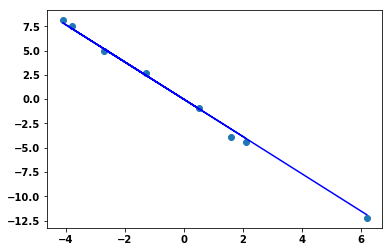

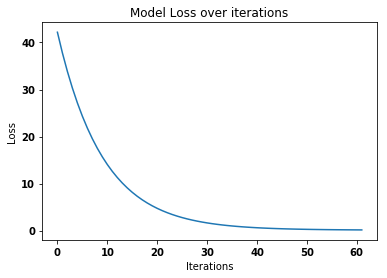

'\nsess = tf.Session()\nsess.run(tf.global_variables_initializer())\n    \nfor step in range(10):\n    sess.run(train_step, feed_dict={x:X, y:Y})\n    #print(step, sess.run(w), sess.run(b)) #You may print loss of each iteration\n    if step % 2 == 0:\n        Y_= sess.run(y_, feed_dict={x:X})\n\n        plt.gca().cla() \n        plt.scatter(X, Y, label="x")\n        plt.plot(X, Y_, \'b\', label="y")\n        display.display(plt.gcf()) \n        display.clear_output(wait=True)\n        time.sleep(0.2) \n'

In [33]:
tf.reset_default_graph()

# Data
X = np.array([[2.1],[1.6],[-3.8],[0.5],[-4.1],[-1.3],[-2.7],[6.2]])
Y = np.array([[-4.4],[-3.9],[7.5],[-0.9],[8.1],[2.7],[4.9],[-12.2]])

# Define your Graph
x = tf.placeholder(tf.float32, [None, 1])
y = tf.placeholder(tf.float32, [None, 1])

b = tf.Variable(tf.zeros([1]))   
w = tf.Variable(tf.zeros([1, 1]))

y_= w * x + b

# Loss & Optimizer
loss = tf.reduce_mean(tf.square(y_ - y))
train_step = tf.train.GradientDescentOptimizer(0.0025).minimize(loss)

# Make directories if necessary
import os
if not os.path.exists("./graphs/"): os.mkdir("./graphs/")
if not os.path.exists("./save/"): os.mkdir("./save/")
    
# Create a writer
writer = tf.summary.FileWriter('./graphs', tf.get_default_graph())
# Create a saver
saver = tf.train.Saver(max_to_keep=100, keep_checkpoint_every_n_hours=0.05)

model_loss = []
# Training (you have to start a tf.Session())
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    #check if there exists trained model (and restore)
    ckpt = tf.train.get_checkpoint_state("./save/")
    if ckpt and ckpt.model_checkpoint_path:
        saver = tf.train.import_meta_graph(ckpt.model_checkpoint_path + ".meta")
        saver.restore(sess, tf.train.latest_checkpoint("./save/"))
        model_loss = list(np.load("./save/model_loss.npy"))
        print("Restore the model and continue training.")

    
    for step in range(30):
        Loss, _ = sess.run([loss, train_step], feed_dict={x:X, y:Y})  #evaluate "loss" & training 
        model_loss.append(Loss)
        print(step, '%2.3f'%sess.run(w)[0][0], sess.run(b))           #display model params <*1> <*2>
        if step % 2 == 0:
            #no need to feed y to Y this time, since you do not need it to calculate Y_
            Y_ = sess.run(y_, feed_dict={x:X})
            
            plt.gca().cla()                                           #for .ipynb display only
            plt.scatter(X, Y, label="x")                              
            plt.plot(X, Y_, 'b', label="y")
            display.display(plt.gcf())                                #for .ipynb display only
            display.clear_output(wait=True)                           #for .ipynb display only
            time.sleep(0.15)                                          #for .ipynb display only
            
            if abs(model_loss[-2]-model_loss[-1]) < 0.09:
                print("stop")
                break
    
    #save the model before the tf.Session is closed
    #since a graph is only active within a tf.Session
    save_path = saver.save(sess, "./save/LSregression")
    np.save("./save/model_loss", model_loss)

writer.close() #close your writer

# Plotting Loss over iterations
fig = plt.figure(figsize=(6, 4))
plt.plot(model_loss)
plt.title("Model Loss over iterations")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.show()

################################################################
# Now please re-run this cell to restore and continue training #
################################################################

# An alternative way to work within tf.Session(): "with tf.Session() as sess:"
'''
sess = tf.Session()
sess.run(tf.global_variables_initializer())
    
for step in range(10):
    sess.run(train_step, feed_dict={x:X, y:Y})
    #print(step, sess.run(w), sess.run(b)) #You may print loss of each iteration
    if step % 2 == 0:
        Y_= sess.run(y_, feed_dict={x:X})

        plt.gca().cla() 
        plt.scatter(X, Y, label="x")
        plt.plot(X, Y_, 'b', label="y")
        display.display(plt.gcf()) 
        display.clear_output(wait=True)
        time.sleep(0.2) 
'''

# <*1>: You can also do: 
#           print(step, w.eval(session=sess), b.eval(session=sess))
#       Ref: http://blog.csdn.net/zcf1784266476/article/details/70259676 
# <*2>: Note that: "sess.run(w)[0][0]" happens when you are evaluating a scalar

## Save and Restore Models in TensorFlow
See above examples for saver, also you can refer to [TensorFlow documentation](https://www.tensorflow.org/api_docs/python/tf/train/Saver).